## Import libraries and dataset

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import articles
articles = pd.read_csv("drive/MyDrive/UNI MAGISTRALE/AI Project/data/articles.csv")
df_art = articles.copy()

In [ ]:
# import customers
customers = pd.read_csv("drive/MyDrive/UNI MAGISTRALE/AI Project/data/customers.csv")
df_cust = customers.copy()

In [ ]:
df_art.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
df_cust.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


## Features engineering CUSTOMERS

i'm going to create a subset to work on Active, FN and fashion_news_frequency and check their correlation. Then I'll make changes in the original dataset

In [ ]:
# Select only 3 columns that we want to study
subset_df = df_cust[['Active', 'FN', 'fashion_news_frequency']].copy()
subset_df

,Active,FN,fashion_news_frequency
0,NaN,NaN,NONE
1,NaN,NaN,NONE
2,NaN,NaN,NONE
3,NaN,NaN,NONE
4,1.0,1.0,Regularly
...,...,...,...
1371975,NaN,NaN,NONE
1371976,NaN,NaN,NONE
1371977,1.0,1.0,Regularly
1371978,1.0,1.0,Regularly


In [ ]:
#I replace "NONE" and "None" values with "Never" in fashion_news_frequency
subset_df["fashion_news_frequency"] = subset_df["fashion_news_frequency"].replace('None', 'Never')
subset_df["fashion_news_frequency"] = subset_df["fashion_news_frequency"].replace('NONE', 'Never')

In [ ]:
# We can consider "monthly" as outliers, and replace them with "regularly"
subset_df["fashion_news_frequency"] = subset_df["fashion_news_frequency"].replace('Monthly', 'Regularly')

In [ ]:
# since it's binary values I convert it to 0 or 1
subset_df["fashion_news_frequency"] = subset_df["fashion_news_frequency"].replace('Never', 0)
subset_df["fashion_news_frequency"] = subset_df["fashion_news_frequency"].replace('Regularly', 1)

In [ ]:
# all nan values become 0, in all the 3 columns
# i can't compute correlation with nan values
subset_df.fillna(0, inplace=True)

In [ ]:
#how the subset is now
subset_df

,Active,FN,fashion_news_frequency
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,1.0,1.0
...,...,...,...
1371975,0.0,0.0,0.0
1371976,0.0,0.0,0.0
1371977,1.0,1.0,1.0
1371978,1.0,1.0,1.0


In [ ]:
# correlation matrix compute and print
correlation_matrix = subset_df.corr()
print(correlation_matrix)

                          Active        FN  fashion_news_frequency
Active                  1.000000  0.979947                0.976244
FN                      0.979947  1.000000                0.995329
fashion_news_frequency  0.976244  0.995329                1.000000


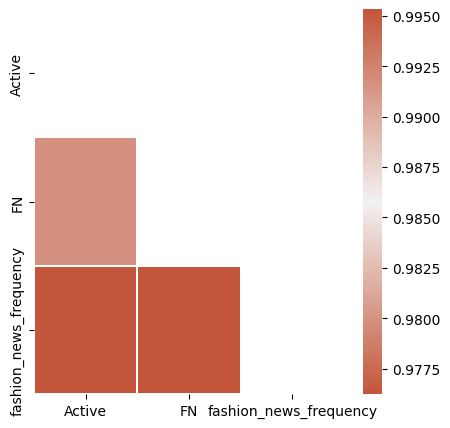

In [ ]:
# plot correlation matrix

corr = subset_df.corr()
fig, ax = plt.subplots(figsize=(5,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(20,20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, linewidths=.1)
#plt.savefig("corr_matrix.svg", format="svg") #uncomment if I want to download
plt.show()

In [ ]:
# they're strongly correlated, so we can drop 2 of them and keep 1, but I want to change the name
# i'm gonna keep fashion_news_frequency case other have too many outliers

In [ ]:
# drop FN and Active
df_cust = df_cust.drop(["FN", "Active"], axis=1)

In [ ]:
#create a new column based on fashion_news_frequency
df_cust["receive_news"] = df_cust["fashion_news_frequency"].apply(lambda x: 1 if x == "Regularly" else 0)
# drop fashion news_frequency
df_cust = df_cust.drop(["fashion_news_frequency"], axis=1)

I'm going to fill nan values in Age with the median value

In [ ]:
# find the median value of the column
mediana = df_cust["age"].median(skipna=True)
print(f"The median value of age column is {mediana}")

The median value of age column is 32.0


In [ ]:
# Replace missing values with median value
df_cust["age"].fillna(mediana, inplace=True)

In [ ]:
# final dataset
df_cust

,customer_id,club_member_status,age,postal_code,receive_news
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,1
...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ACTIVE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ACTIVE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ACTIVE,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,1
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,ACTIVE,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,1


### Export new costumers

In [ ]:
folder = "drive/MyDrive/UNI MAGISTRALE/AI Project/data/"
df_cust.to_csv(folder + "final_cust.csv")

##Features Engineering ARTICLES description

I want to classify every item as "winter" or "summer" usind its description and with a sistem based on semantic similarity. I'm gonna use bert

In [ ]:
# drop null and missing values from the column
df_art.dropna(subset=['detail_desc'], inplace=True)

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.6 MB/s eta 0:00:00


In [ ]:
# make a list of all the descriptions
sentences = df_art["detail_desc"].unique().tolist()
len(sentences)

43404

In [ ]:
#some common imports
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch

### Attempt 1

I'm going to get the embedding of every sentence (I have to do that in batches) and compare that to the embedding of winter and summer

In [ ]:
# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

In [ ]:
sent = sentences

In [ ]:
# create batches (200 sentences in every batch ca.)
num_batches = 200

batch_size = len(sent) // num_batches

# split sentences into batch
batches = [sent[i:i + batch_size] for i in range(0, len(sent), batch_size)]


In [ ]:
type(batches[0])

list

In [ ]:
# I create the sentences for the seasons
seasons = ["Autumn Winter", "Spring Summer"]

# Tokenize and encode sentences
inputs_seas = tokenizer(seasons, padding=True, truncation=True, return_tensors="pt")
outputs_seas = model(**inputs_seas)

# Get the sentence embeddings from the output
season_embeddings = outputs_seas.last_hidden_state.mean(dim=1)

In [ ]:

# Tokenize and encode your sentences
inputs_sent = tokenizer(batches[0], padding=True, truncation=True, return_tensors="pt")
outputs_sent = model(**inputs_sent)

# Get the sentence embeddings from the output
sentence_embeddings = outputs_sent.last_hidden_state.mean(dim=1)

similarity_matrix = cosine_similarity(sentence_embeddings.detach().numpy(), season_embeddings.detach().numpy())

print(f"Similarità del coseno tra le frasi: {batches[0][0]} and {seasons[0]} is {similarity_matrix[0][0]}")
print(f"Similarità del coseno tra le frasi: {batches[0][0]} and {seasons[1]} is {similarity_matrix[0][1]}")


Similarità del coseno tra le frasi: Jersey top with narrow shoulder straps. and Winter Autumn warm clothes and cold weather is 0.44531017541885376
Similarità del coseno tra le frasi: Jersey top with narrow shoulder straps. and Summer Spring lightweight clothes and sunny weather is 0.5363214015960693


In [ ]:
sent_to_emb = {}

In [ ]:
sent_to_season = {}

In [ ]:
for frase in sent[400:450]:
  # Tokenize and encode your sentences
  inputs_sent = tokenizer(frase, padding=True, truncation=True, return_tensors="pt")
  outputs_sent = model(**inputs_sent)

  # Get the sentence embeddings from the output
  sentence_embeddings = outputs_sent.last_hidden_state.mean(dim=1)

  #compute similarity matrix
  similarity_matrix = cosine_similarity(sentence_embeddings.detach().numpy(), season_embeddings.detach().numpy())

  if similarity_matrix[0][0] > similarity_matrix[0][1]:
    conto = 0
  else:
    conto = 1

  print(f"{similarity_matrix[0][0]} e {similarity_matrix[0][1]}")
  print(f"{frase} annd {conto}")
  print()

0.41624191403388977 e 0.4358997046947479
Top in patterned jersey with a boat neck and 3/4-length sleeves. annd 1

0.41179972887039185 e 0.42145317792892456
Top in soft jersey with short raglan sleeves with sewn-in turn-ups. annd 1

0.39721760153770447 e 0.393527090549469
Aviator-style,tinted sunglasses with metal and plastic frames and UV-protective, tinted lenses. annd 0

0.3768013119697571 e 0.39913439750671387
Tights that provide support for the tummy, thighs and calves as well as encouraging circulation in the legs. Elasticated waist and extra space for a growing tummy. 30 denier. annd 1

0.42579537630081177 e 0.45531636476516724
Long-sleeved T-shirt in waffled cotton jersey with ribbed cuffs. annd 1

0.34486767649650574 e 0.38484352827072144
Sports vest top in fast-drying functional fabric with a racer back that has a rubber print and ventilating hole pattern. annd 1

0.3928540349006653 e 0.4149923026561737
Trousers in sweatshirt fabric made from organic cotton with an elasticated

### Attempt 2

i'm gonna try to use clusters to see how sentences are divided

In [ ]:
from sklearn.cluster import KMeans

# Example clothing descriptions (replace with your own data)
clothing_descriptions = sentences[:200]

# Load a pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Tokenize and obtain BERT embeddings for each description
def get_bert_embeddings(texts):
    tokenized_texts = [tokenizer(text, padding=True, truncation=True, return_tensors="pt") for text in texts]
    embeddings = [model(**text).last_hidden_state.mean(dim=1).squeeze().detach().numpy() for text in tokenized_texts]
    return np.array(embeddings)

description_embeddings = get_bert_embeddings(clothing_descriptions)

# Perform K-Means clustering
n_clusters = 2  # Set the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(description_embeddings)

# Print the clusters and their corresponding descriptions
for cluster_id in range(n_clusters):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    print(f"Cluster {cluster_id + 1}:")
    for idx in cluster_indices:
        print(f"- {clothing_descriptions[idx]}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
- Semi shiny nylon stockings with a wide, reinforced trim at the top. Use with a suspender belt. 20 denier.
- Tights with built-in support to lift the bottom. Black in 30 denier and light amber in 15 denier.
- Semi shiny tights that shape the tummy, thighs and calves while also encouraging blood circulation in the legs. Elasticated waist.
- Opaque matt tights. 200 denier.
- Sweatshirt in soft organic cotton with a  press-stud on one shoulder (sizes 12-18 months and 18-24 months without a press-stud). Brushed inside.
- 50 denier tights with reinforcement at the top for a shaping effect on the tummy and thighs.
- Plastic hair claws. Width 3.5 cm.
- Umbrella with a telescopic handle and matching cover. Length 23 cm folded.
- Matt tights with an elasticated waist and extra space for a growing tummy. 100 denier.
- Long-sleeved sports top in fast-drying, breathable functional fabric with overlocked seams for optimum comfort. Some of the polyester content of the top is recycled.
- 

### Attempt 3: OK

In [ ]:
# some libraries
from transformers import AutoTokenizer, AutoModel

In [ ]:
# create model
model_name = 'bert-base-cased'

# load model
model = AutoModel.from_pretrained(model_name, output_hidden_states=True, output_attentions=True)

# load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
#create a dictionary for seasons embeddings
seasons_emb = {}
#these are the sentences for the season collections
seasons = ["Spring Summer collection", "Autumn Winter collection"]

In [ ]:
#for both the seasons
for frase_input in seasons:

  #tokenize and encode
  tokens = tokenizer.tokenize(frase_input, add_special_tokens=True)
  input_ids = tokenizer.encode(frase_input, add_special_tokens=True)

  input_ids = torch.tensor([input_ids])

  #apply the model
  with torch.no_grad():
    outputs = model(input_ids)

  all_hidden_states = outputs["hidden_states"]
  attention_heads = outputs["attentions"]

  n_strati = len(all_hidden_states)

  #select layer
  layer = 12
  # get hidden states at that layer (last one)
  hidden_state = all_hidden_states[layer]
  dim_hidden_state = hidden_state.shape
  #print("Dimensione del tensore:", dim_hidden_state)

  # get embeddings from the tokens and link them to representations
  embeddings_frase = hidden_state[0]
  word_embeddings = {k:v for k, v in zip(tokens, embeddings_frase)}

  #embedding of firs token CLS is considered to be the embedding of the sentence
  frase = word_embeddings["[CLS]"]

  # add embedding to the dictionary
  seasons_emb[frase_input] = word_embeddings["[CLS]"]

In [ ]:
len(seasons_emb)

2

In [ ]:
#get embeddings of seasons
estate = seasons_emb['Spring Summer collection']
inverno = seasons_emb['Autumn Winter collection']

#define functions to get cosine similarity between a season ad a sentence

def get_cosine_similarity_summer(estate, frase):
    return cosine_similarity(estate.reshape(1, -1), frase.reshape(1, -1))[0][0]

def get_cosine_similarity_winter(inverno, frase):
    return cosine_similarity(inverno.reshape(1, -1), frase.reshape(1, -1))[0][0]

In [ ]:
#create a new dictionary for binary values
sentence_to_season = {}

In [ ]:
#for every unique description
for frase_input in sentences:

  #tokenize and encode
  tokens = tokenizer.tokenize(frase_input, add_special_tokens=True)
  input_ids = tokenizer.encode(frase_input, add_special_tokens=True)

  input_ids = torch.tensor([input_ids])

  #apply the model
  with torch.no_grad():
    outputs = model(input_ids)

  all_hidden_states = outputs["hidden_states"]
  attention_heads = outputs["attentions"]
  n_strati = len(all_hidden_states)

  # select the layer
  layer = 12
  #get the hidden state
  hidden_state = all_hidden_states[layer]
  dim_hidden_state = hidden_state.shape

  #get embedding at that hidden state
  embeddings_frase = hidden_state[0]
  # link to representations
  word_embeddings = {k:v for k, v in zip(tokens, embeddings_frase)}

  #get embedding of the sentence
  frase = word_embeddings["[CLS]"]

  #update the dictionary with 0 for summer and 1 for winter
  if get_cosine_similarity_summer(estate, frase) > get_cosine_similarity_winter(inverno, frase):
    sentence_to_season[frase_input] = 0
  else:
    sentence_to_season[frase_input] = 1


In [ ]:
len(sentence_to_season)

43404

In [ ]:
#create a function to map dictionary values to a new feature
def assegna_categoria(frase):
  return sentence_to_season[frase]


In [ ]:
#new column is Season
df_art['Season'] = df_art['detail_desc'].apply(assegna_categoria)

In [ ]:
df_art

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,Season
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,1
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,1
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,1
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",1
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...,1
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...,1
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec...",1
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.,1


### Export new articles

In [ ]:
#export to parquet
folder = "drive/MyDrive/UNI MAGISTRALE/AI Project/data/"
df_art.to_parquet(folder + "final_art.parquet")
